In [63]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = yf.download('SPY','2020-01-01','2025-12-20')

[*********************100%***********************]  1 of 1 completed


In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-01-02,297.698975,297.717320,295.554688,296.480224,59151200
2020-01-03,295.444702,296.571839,294.244268,294.299248,77709700
2020-01-06,296.571838,296.654308,293.566140,293.685272,55653900
2020-01-07,295.738007,296.480259,295.288969,296.003732,40496400
2020-01-08,297.314148,298.532899,295.683022,295.930430,68296000


In [12]:
df['log_ret'] = np.log(df['Close']/df['Close'].shift(1))

In [13]:
df['log_ret'].head()

Date
2020-01-02         NaN
2020-01-03   -0.007601
2020-01-06    0.003808
2020-01-07   -0.002816
2020-01-08    0.005315
Name: log_ret, dtype: float64

In [16]:
df.dropna()

Price,Close,High,Low,Open,Volume,log_ret
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2020-01-03,295.444702,296.571839,294.244268,294.299248,77709700,-0.007601
2020-01-06,296.571838,296.654308,293.566140,293.685272,55653900,0.003808
2020-01-07,295.738007,296.480259,295.288969,296.003732,40496400,-0.002816
2020-01-08,297.314148,298.532899,295.683022,295.930430,68296000,0.005315
2020-01-09,299.330078,299.403403,298.294583,298.881069,48473300,0.006758
...,...,...,...,...,...,...
2025-12-15,678.724426,683.739636,677.248806,683.719676,90811000,-0.001512
2025-12-16,676.869934,679.073445,672.991380,677.228859,122030600,-0.002736


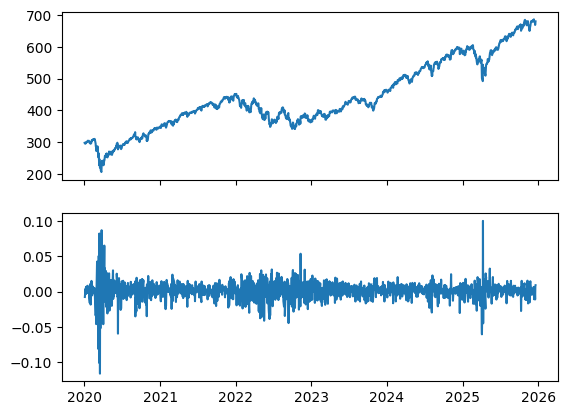

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True)
x = df.index
y = df['Close']
axes[0].plot(x,y)
z = df['log_ret']

axes[1].plot(x,z)

In [21]:
golddf = yf.download('GLD','2020-01-01','2025-12-20')
gdxdf = yf.download('GDX','2020-01-01','2025-12-20')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
golddf['GLD_n_price'] = golddf['Close']/golddf['Close'].iloc[0]

In [28]:
gdxdf['GDX_n_price'] = gdxdf['Close']/gdxdf['Close'].iloc[0]

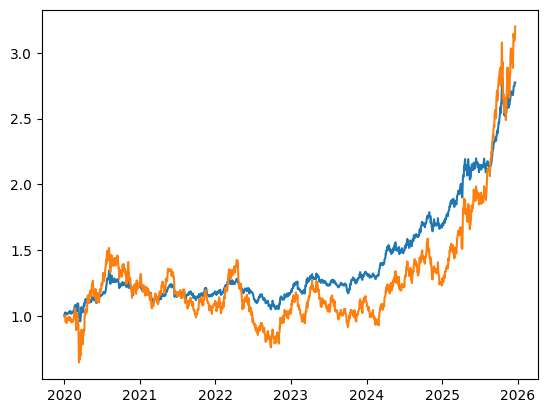

In [31]:
fig = plt.figure()

plt.plot(golddf.index,golddf['GLD_n_price'])
plt.plot(golddf.index,gdxdf['GDX_n_price'])

In [32]:
df_pairs = pd.concat([golddf['Close'], gdxdf['Close']], axis=1)
df_pairs.head()

Ticker,GLD,GDX
Date,,
2020-01-02,143.949997,27.242306
2020-01-03,145.860001,27.075232
2020-01-06,147.389999,27.121637
2020-01-07,147.970001,27.381533
2020-01-08,146.860001,26.314117


In [33]:
from statsmodels.tsa.stattools import coint

In [38]:
score, p_value, _ = coint(df_pairs['GLD'], df_pairs['GDX'],trend='ctt')

In [39]:
p_value

np.float64(0.08692940944201472)

## Testing Coca-Cola vs Pepsi

In [40]:
cocadf = yf.download('KO','2020-01-01','2025-12-20')
pepsidf = yf.download('PEP','2020-01-01','2025-12-20')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
cocadf['coca_n_price'] = cocadf['Close']/cocadf['Close'].iloc[0]
pepsidf['pep_n_price'] = pepsidf['Close']/pepsidf['Close'].iloc[0]

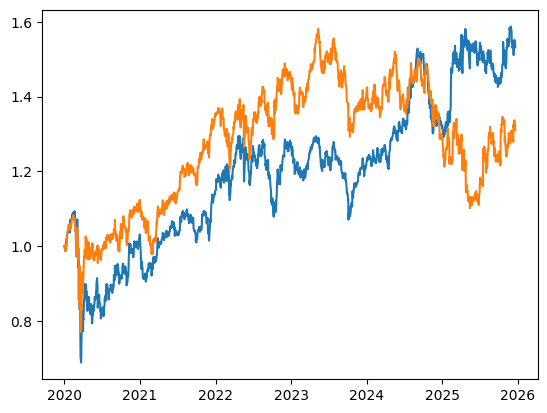

In [43]:
fig = plt.figure()

plt.plot(cocadf.index,cocadf['coca_n_price'])
plt.plot(cocadf.index,pepsidf['pep_n_price'])

In [44]:
df_pairs2 = pd.concat([cocadf['Close'], pepsidf['Close']], axis=1)
df_pairs2.head()

Ticker,KO,PEP
Date,,
2020-01-02,45.745113,113.114029
2020-01-03,45.495541,112.955788
2020-01-06,45.478905,113.388870
2020-01-07,45.129513,111.606621
2020-01-08,45.212696,112.181252


In [48]:
score, p_value, _ = coint(df_pairs2['KO'], df_pairs2['PEP'],trend='ct')
p_value

np.float64(0.048479228209076075)

## Testing Exxon vs Chevron

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


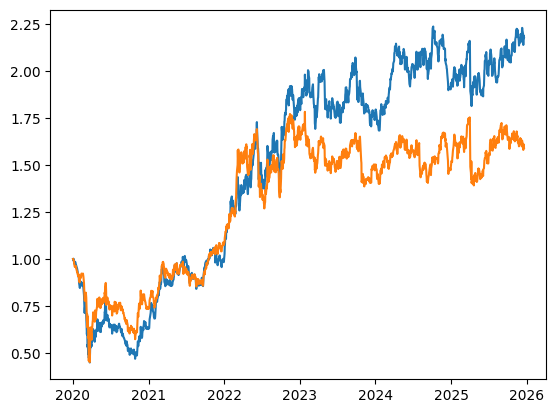

In [49]:
#importing data
xomdf = yf.download('XOM','2020-01-01','2025-12-20')
cvxdf = yf.download('CVX','2020-01-01','2025-12-20')

#normalizing values
xomdf['xom_n_price'] = xomdf['Close']/xomdf['Close'].iloc[0]
cvxdf['cvx_n_price'] = cvxdf['Close']/cvxdf['Close'].iloc[0]

#plotting visualization
fig = plt.figure()

plt.plot(xomdf.index,xomdf['xom_n_price'])
plt.plot(cvxdf.index,cvxdf['cvx_n_price'])

In [59]:
#creating new df to pair xom & cvx
df_pairs3 = pd.concat([xomdf['Close'], cvxdf['Close']], axis=1)
#applying cointegration test
score, p_value, _ = coint(df_pairs3['XOM'], df_pairs3['CVX'],trend='c')
p_value

np.float64(0.24732352240074457)

## Validating Methodology with Goog & Googl

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


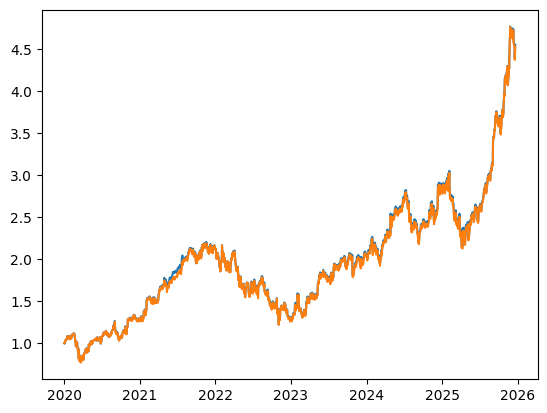

In [61]:
#importing data
googdf = yf.download('GOOG','2020-01-01','2025-12-20')
googldf = yf.download('GOOGL','2020-01-01','2025-12-20')

#normalizing values
googdf['goog_n_price'] = googdf['Close']/googdf['Close'].iloc[0]
googldf['googl_n_price'] = googldf['Close']/googldf['Close'].iloc[0]

#plotting visualization
fig = plt.figure()

plt.plot(googdf.index,googdf['goog_n_price'])
plt.plot(googldf.index,googldf['googl_n_price'])

In [62]:
#creating new df to pair xom & cvx
df_pairs4 = pd.concat([googdf['Close'], googldf['Close']], axis=1)
#applying cointegration test
score, p_value, _ = coint(df_pairs4['GOOG'], df_pairs4['GOOGL'],trend='c')
p_value

np.float64(0.018433093861370268)

In [65]:
appledf = yf.download('AAPL','2020-05-01','2020-12-01')

[*********************100%***********************]  1 of 1 completed


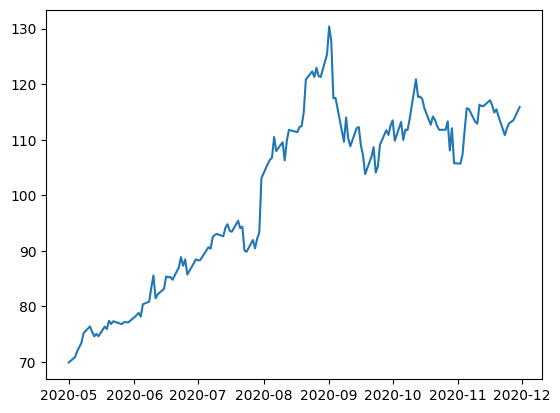

In [68]:
# determine whether yfinance adjusts for stock split
fig = plt.figure()
plt.plot(appledf.index,appledf['Close'])